In [3]:
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Data Collection and Preprocessing

### Take a look at influencer data

In [4]:
influencer_df = pd.read_csv('fashion_influencer.csv', index_col=0)
influencer_df = influencer_df.rename(columns={"Sponser": "Sponsor"})

In [5]:
influencer_df 

,Username,Sponsor,json_file,image_files,#Followers,#Followees,#Posts
0,alisasia,1,1309041812857818435.json,['1309041812857818435.jpg'],41099.0,320.0,691.0
1,alisasia,0,1311846669234786866.json,['1311846669234786866.jpg'],41099.0,320.0,691.0
2,alisasia,0,1315560311952470229.json,['1315560311952470229.jpg'],41099.0,320.0,691.0
3,alisasia,0,1318531733175899446.json,['1318531733175899446.jpg'],41099.0,320.0,691.0
4,alisasia,0,1343280729400051114.json,['1343280729400051114.jpg'],41099.0,320.0,691.0
...,...,...,...,...,...,...,...
657887,weartoeatiff,0,1949295446478195019.json,"['1949295349831331714.jpg', '19492953511652346...",122015.0,0.0,1712.0
657888,weartoeatiff,0,1978237819459270675.json,['1978237819459270675.jpg'],122015.0,0.0,1712.0
657889,weartoeatiff,0,1981902699290795070.json,['1981902699290795070.jpg'],122015.0,0.0,1712.0
657890,weartoeatiff,0,1983336335558866484.json,['1983336335558866484.jpg'],122015.0,0.0,1712.0


In [6]:
user_df = influencer_df.groupby('Username').count()
user_df

,Sponsor,json_file,image_files,#Followers,#Followees,#Posts
Username,,,,,,
1000manerasdevestir,85,85,85,85,85,85
19dreamcatcherz,9,9,9,9,9,9
1_0.8,5,5,5,5,5,5
1nonlycash,4,4,4,4,4,4
22in22,11,11,11,11,11,11
...,...,...,...,...,...,...
zsuzsubell,12,12,12,12,12,12
zubiiansarii,40,40,40,40,40,40
zurich.influencers,13,13,13,13,13,13


In [7]:
print("There are \'", user_df.shape[0], "\' influencers in the dataset")

There are ' 9290 ' influencers in the dataset


In [8]:
user_sponsor = influencer_df[['Username', 'Sponsor']]
user_sponsor['Sponsor'].value_counts()

0    550050
1     88691
Name: Sponsor, dtype: int64

### Extract post data from json files

In [9]:
# dir: the directory where those json files are stored in, make sure to use the right input
# json_list: the list of json files that you want to merged (the list file name should contain '.json')
#
# One issue: the amount of comments sometimes don't fit with the lenth of edge
def process_json_files(dir, json_list):
    df_list = []
    caption_list = []
    for i in json_list:
        data = []          
        content = json.load(open(os.path.join(dir, i)))
        caption_list_item = content['edge_media_to_caption']['edges']
        if len(caption_list_item) == 0:
            caption = ''
        else: 
            caption = caption_list_item[-1]['node']['text']
        caption_list.append(caption)
        hashtag_list = re.findall(r'#(\w+)', caption)
        data.append({
            'json': i,
            'post_timestamp': content['taken_at_timestamp'],
            'likes': content['edge_media_preview_like']['count'],
            'comments': content['edge_media_to_comment']['count'],
            #'post_text': content['edge_media_to_caption']['edges'][0]['node']['text'],
            'edge_media_to_comment': content.get('edge_media_to_comment').get('edges'),
            'edge_media_to_sponsor_user': content.get('edge_media_to_sponsor_user'),
            'edge_media_to_tagged_user': content.get('edge_media_to_tagged_user'),
            'hashtags':hashtag_list,
            'hashtag_count':len(hashtag_list)
        })
        
        df_list.append(pd.DataFrame(data))
        
        
    df = pd.concat(df_list, ignore_index=True)
    df['caption'] = caption_list
    #df['hashtags'] = hashtag_list
    return df

In [9]:
# Define the folder path
folder_path = "json_fashion\json"

# List to store all file names
all_files = []
files_name = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
  # Append all filenames to the list
  all_files.append(filename)

# Print the list of all files
for file in all_files:
    files_name.append(file)

In [40]:
post_df = process_json_files('data\json', files_name)
post_df

NameError: name 'process_json_files' is not defined

Save post data for future usage

In [ ]:
post_df.to_csv('post_test.csv')

In [10]:
post_df = pd.read_csv('post_test.csv')

### Merge influencer and post dataframe

In [11]:
influencer_df_extracted = influencer_df[['json_file', 'Username', 'Sponsor','#Followers', '#Posts']]
post_df_extracted = post_df[['json', 'post_timestamp', 'likes','comments', 'caption','hashtags','hashtag_count']]

In [12]:
merged = pd.merge(left=post_df_extracted, right=influencer_df_extracted, left_on='json', right_on='json_file')
merged = merged.drop(columns=['json_file'])
merged

,json,post_timestamp,likes,comments,caption,hashtags,hashtag_count,Username,Sponsor,#Followers,#Posts
0,1778527492682732179.json,1526237020,172,11,These sunnies are going to be my summer favs! ...,"['liketkit', 'LTKunder50', 'LTKstyletip']",3,layersnlipstick,0,3105.0,1652.0
1,1944636038815427244.json,1546038702,259,6,It’s crazy how much more in tune with body I’v...,"['avawomen', 'avapartner', 'avabracelet']",3,madison_silotti,0,4937.0,805.0
2,1919337317395337083.json,1543022859,3191,39,Hi sweet friends! Currently enjoying our Chris...,"['OnAnyStage', 'FunInLine', 'BoHugglesworth', ...",10,mrs.rebeccarobinson,0,83376.0,1468.0
3,1973686443494832201.json,1549501780,3217,69,Bralette and shorts kinda day ☀️🌞 soaking up t...,"['liketkit', 'fpme', 'flatlay', 'myrm', 'quay'...",7,thehouseofsequins,0,225990.0,2451.0
4,1687821871570856682.json,1515424067,1268,88,Love my makeup today 😍 and got my new extensio...,"['HealthyGlowingSkinForLife', 'DermalogicaUK',...",5,scoynex,0,34957.0,799.0
...,...,...,...,...,...,...,...,...,...,...,...
425606,1938593043369662682.json,1545318321,11094,18,I'm never too cool to create or help others se...,"['thestylemonk', 'nike', '2019', 'entrepreneur']",4,jeromelamaar,0,232436.0,977.0
425607,2002986686942145187.json,1552994641,547,20,You guys looooved this sweater and jeans yeste...,"['liketkit', 'ootd', 'mirrorselfie']",3,mrscocowyse,0,110414.0,4267.0
425608,1867448645486726111.json,1536837248,451,80,A perfect outfit for this ‘cold in the morning...,"['liketkit', 'LTKstyletip', 'LTKunder50']",3,jennaleeannllc,0,9110.0,561.0
425609,1459428168212777165.json,1488197416,187,29,"Here we go, people..Monday morning..let's do t...","['liketkit', 'ltkunder50', 'ots', 'momjeans', ...",5,laura.lehman,0,11388.0,810.0


### calculate engagement rate (ER)
#### ER = (likes + comments) / followers

In [13]:
merged['ER'] = (merged['likes'] + merged['comments'])/merged['#Followers']
merged

,json,post_timestamp,likes,comments,caption,hashtags,hashtag_count,Username,Sponsor,#Followers,#Posts,ER
0,1778527492682732179.json,1526237020,172,11,These sunnies are going to be my summer favs! ...,"['liketkit', 'LTKunder50', 'LTKstyletip']",3,layersnlipstick,0,3105.0,1652.0,0.058937
1,1944636038815427244.json,1546038702,259,6,It’s crazy how much more in tune with body I’v...,"['avawomen', 'avapartner', 'avabracelet']",3,madison_silotti,0,4937.0,805.0,0.053676
2,1919337317395337083.json,1543022859,3191,39,Hi sweet friends! Currently enjoying our Chris...,"['OnAnyStage', 'FunInLine', 'BoHugglesworth', ...",10,mrs.rebeccarobinson,0,83376.0,1468.0,0.038740
3,1973686443494832201.json,1549501780,3217,69,Bralette and shorts kinda day ☀️🌞 soaking up t...,"['liketkit', 'fpme', 'flatlay', 'myrm', 'quay'...",7,thehouseofsequins,0,225990.0,2451.0,0.014540
4,1687821871570856682.json,1515424067,1268,88,Love my makeup today 😍 and got my new extensio...,"['HealthyGlowingSkinForLife', 'DermalogicaUK',...",5,scoynex,0,34957.0,799.0,0.038791
...,...,...,...,...,...,...,...,...,...,...,...,...
425606,1938593043369662682.json,1545318321,11094,18,I'm never too cool to create or help others se...,"['thestylemonk', 'nike', '2019', 'entrepreneur']",4,jeromelamaar,0,232436.0,977.0,0.047807
425607,2002986686942145187.json,1552994641,547,20,You guys looooved this sweater and jeans yeste...,"['liketkit', 'ootd', 'mirrorselfie']",3,mrscocowyse,0,110414.0,4267.0,0.005135
425608,1867448645486726111.json,1536837248,451,80,A perfect outfit for this ‘cold in the morning...,"['liketkit', 'LTKstyletip', 'LTKunder50']",3,jennaleeannllc,0,9110.0,561.0,0.058288
425609,1459428168212777165.json,1488197416,187,29,"Here we go, people..Monday morning..let's do t...","['liketkit', 'ltkunder50', 'ots', 'momjeans', ...",5,laura.lehman,0,11388.0,810.0,0.018967


### Drop missing value(s)

In [14]:
df_ = merged.copy()

In [15]:
# Check data types and missing values
print(df_.info())

# Descriptive statistics for numerical columns
print(df_.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 425611 entries, 0 to 425610
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   json            425611 non-null  object 
 1   post_timestamp  425611 non-null  int64  
 2   likes           425611 non-null  int64  
 3   comments        425611 non-null  int64  
 4   caption         424182 non-null  object 
 5   hashtags        425611 non-null  object 
 6   hashtag_count   425611 non-null  int64  
 7   Username        425611 non-null  object 
 8   Sponsor         425611 non-null  int64  
 9   #Followers      425611 non-null  float64
 10  #Posts          425611 non-null  float64
 11  ER              425611 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 42.2+ MB
None
       post_timestamp         likes       comments  hashtag_count  \
count    4.256110e+05  4.256110e+05  425611.000000  425611.000000   
mean     1.532124e+09  4.913598e+03    

Missing values: caption.

Drop 1429 posts with missing captions

In [16]:
df_ = df_.dropna(subset=['caption'], inplace=False)

In [17]:
df_

,json,post_timestamp,likes,comments,caption,hashtags,hashtag_count,Username,Sponsor,#Followers,#Posts,ER
0,1778527492682732179.json,1526237020,172,11,These sunnies are going to be my summer favs! ...,"['liketkit', 'LTKunder50', 'LTKstyletip']",3,layersnlipstick,0,3105.0,1652.0,0.058937
1,1944636038815427244.json,1546038702,259,6,It’s crazy how much more in tune with body I’v...,"['avawomen', 'avapartner', 'avabracelet']",3,madison_silotti,0,4937.0,805.0,0.053676
2,1919337317395337083.json,1543022859,3191,39,Hi sweet friends! Currently enjoying our Chris...,"['OnAnyStage', 'FunInLine', 'BoHugglesworth', ...",10,mrs.rebeccarobinson,0,83376.0,1468.0,0.038740
3,1973686443494832201.json,1549501780,3217,69,Bralette and shorts kinda day ☀️🌞 soaking up t...,"['liketkit', 'fpme', 'flatlay', 'myrm', 'quay'...",7,thehouseofsequins,0,225990.0,2451.0,0.014540
4,1687821871570856682.json,1515424067,1268,88,Love my makeup today 😍 and got my new extensio...,"['HealthyGlowingSkinForLife', 'DermalogicaUK',...",5,scoynex,0,34957.0,799.0,0.038791
...,...,...,...,...,...,...,...,...,...,...,...,...
425606,1938593043369662682.json,1545318321,11094,18,I'm never too cool to create or help others se...,"['thestylemonk', 'nike', '2019', 'entrepreneur']",4,jeromelamaar,0,232436.0,977.0,0.047807
425607,2002986686942145187.json,1552994641,547,20,You guys looooved this sweater and jeans yeste...,"['liketkit', 'ootd', 'mirrorselfie']",3,mrscocowyse,0,110414.0,4267.0,0.005135
425608,1867448645486726111.json,1536837248,451,80,A perfect outfit for this ‘cold in the morning...,"['liketkit', 'LTKstyletip', 'LTKunder50']",3,jennaleeannllc,0,9110.0,561.0,0.058288
425609,1459428168212777165.json,1488197416,187,29,"Here we go, people..Monday morning..let's do t...","['liketkit', 'ltkunder50', 'ots', 'momjeans', ...",5,laura.lehman,0,11388.0,810.0,0.018967


### Extract and Encode features

Transfer post time to datetime form

In [18]:
df_['post_timestamp'] = df_['post_timestamp'].apply(lambda d:dt.datetime.fromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S'))
df_['post_timestamp'] = pd.to_datetime(df_['post_timestamp'])

Extract year, month, day, hour

In [19]:
df_['year'] = df_['post_timestamp'].dt.year
df_['month'] = df_['post_timestamp'].dt.month
df_['day'] = df_['post_timestamp'].dt.day
df_['hour'] = df_['post_timestamp'].dt.hour
df_['minute'] = df_['post_timestamp'].dt.minute
df_['second'] = df_['post_timestamp'].dt.second
df_['caption_length'] = [len(x) for x in df_['caption']]

df_

,json,post_timestamp,likes,comments,caption,hashtags,hashtag_count,Username,Sponsor,#Followers,#Posts,ER,year,month,day,hour,minute,second,caption_length
0,1778527492682732179.json,2018-05-13 14:43:40,172,11,These sunnies are going to be my summer favs! ...,"['liketkit', 'LTKunder50', 'LTKstyletip']",3,layersnlipstick,0,3105.0,1652.0,0.058937,2018,5,13,14,43,40,198
1,1944636038815427244.json,2018-12-28 18:11:42,259,6,It’s crazy how much more in tune with body I’v...,"['avawomen', 'avapartner', 'avabracelet']",3,madison_silotti,0,4937.0,805.0,0.053676,2018,12,28,18,11,42,760
2,1919337317395337083.json,2018-11-23 20:27:39,3191,39,Hi sweet friends! Currently enjoying our Chris...,"['OnAnyStage', 'FunInLine', 'BoHugglesworth', ...",10,mrs.rebeccarobinson,0,83376.0,1468.0,0.038740,2018,11,23,20,27,39,535
3,1973686443494832201.json,2019-02-06 20:09:40,3217,69,Bralette and shorts kinda day ☀️🌞 soaking up t...,"['liketkit', 'fpme', 'flatlay', 'myrm', 'quay'...",7,thehouseofsequins,0,225990.0,2451.0,0.014540,2019,2,6,20,9,40,394
4,1687821871570856682.json,2018-01-08 10:07:47,1268,88,Love my makeup today 😍 and got my new extensio...,"['HealthyGlowingSkinForLife', 'DermalogicaUK',...",5,scoynex,0,34957.0,799.0,0.038791,2018,1,8,10,7,47,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425606,1938593043369662682.json,2018-12-20 10:05:21,11094,18,I'm never too cool to create or help others se...,"['thestylemonk', 'nike', '2019', 'entrepreneur']",4,jeromelamaar,0,232436.0,977.0,0.047807,2018,12,20,10,5,21,189
425607,2002986686942145187.json,2019-03-19 07:24:01,547,20,You guys looooved this sweater and jeans yeste...,"['liketkit', 'ootd', 'mirrorselfie']",3,mrscocowyse,0,110414.0,4267.0,0.005135,2019,3,19,7,24,1,223
425608,1867448645486726111.json,2018-09-13 07:14:08,451,80,A perfect outfit for this ‘cold in the morning...,"['liketkit', 'LTKstyletip', 'LTKunder50']",3,jennaleeannllc,0,9110.0,561.0,0.058288,2018,9,13,7,14,8,306
425609,1459428168212777165.json,2017-02-27 07:10:16,187,29,"Here we go, people..Monday morning..let's do t...","['liketkit', 'ltkunder50', 'ots', 'momjeans', ...",5,laura.lehman,0,11388.0,810.0,0.018967,2017,2,27,7,10,16,178


Merged with dataframe with season and other time-series elements

In [20]:
feature_df = pd.read_csv('post_time_features.csv')
feature_df

,post_timestamp,likes,comments,sponsor,ER,#Followers,#Posts,json,year,month,day,hour,weekday,season,hour_category,working_hour_status
0,2018-05-13 14:43:40,172,11,0,0.058937,3105.0,1652.0,1778527492682732179.json,2018,5,13,14,7,Spring,12-15,non_working_hour
1,2018-12-28 18:11:42,259,6,0,0.053676,4937.0,805.0,1944636038815427244.json,2018,12,28,18,5,Winter,18-21,non_working_hour
2,2018-11-23 20:27:39,3191,39,0,0.038740,83376.0,1468.0,1919337317395337083.json,2018,11,23,20,5,Fall,18-21,non_working_hour
3,2019-02-06 20:09:40,3217,69,0,0.014540,225990.0,2451.0,1973686443494832201.json,2019,2,6,20,3,Winter,18-21,non_working_hour
4,2018-01-08 10:07:47,1268,88,0,0.038791,34957.0,799.0,1687821871570856682.json,2018,1,8,10,1,Winter,9-12,working_hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392839,2018-12-20 10:05:21,11094,18,0,0.047807,232436.0,977.0,1938593043369662682.json,2018,12,20,10,4,Winter,9-12,working_hour
392840,2019-03-19 07:24:01,547,20,0,0.005135,110414.0,4267.0,2002986686942145187.json,2019,3,19,7,2,Spring,6-9,non_working_hour
392841,2018-09-13 07:14:08,451,80,0,0.058288,9110.0,561.0,1867448645486726111.json,2018,9,13,7,4,Fall,6-9,non_working_hour
392842,2017-02-27 07:10:16,187,29,0,0.018967,11388.0,810.0,1459428168212777165.json,2017,2,27,7,1,Winter,6-9,non_working_hour


In [21]:
df_ = df_[['json', 'caption', 'hashtags', 'hashtag_count', 'Username', 'caption_length']]
merged_total = pd.merge(left=feature_df, right=df_, on = 'json')
merged_total

,post_timestamp,likes,comments,sponsor,ER,#Followers,#Posts,json,year,month,...,hour,weekday,season,hour_category,working_hour_status,caption,hashtags,hashtag_count,Username,caption_length
0,2018-05-13 14:43:40,172,11,0,0.058937,3105.0,1652.0,1778527492682732179.json,2018,5,...,14,7,Spring,12-15,non_working_hour,These sunnies are going to be my summer favs! ...,"['liketkit', 'LTKunder50', 'LTKstyletip']",3,layersnlipstick,198
1,2018-12-28 18:11:42,259,6,0,0.053676,4937.0,805.0,1944636038815427244.json,2018,12,...,18,5,Winter,18-21,non_working_hour,It’s crazy how much more in tune with body I’v...,"['avawomen', 'avapartner', 'avabracelet']",3,madison_silotti,760
2,2018-11-23 20:27:39,3191,39,0,0.038740,83376.0,1468.0,1919337317395337083.json,2018,11,...,20,5,Fall,18-21,non_working_hour,Hi sweet friends! Currently enjoying our Chris...,"['OnAnyStage', 'FunInLine', 'BoHugglesworth', ...",10,mrs.rebeccarobinson,535
3,2019-02-06 20:09:40,3217,69,0,0.014540,225990.0,2451.0,1973686443494832201.json,2019,2,...,20,3,Winter,18-21,non_working_hour,Bralette and shorts kinda day ☀️🌞 soaking up t...,"['liketkit', 'fpme', 'flatlay', 'myrm', 'quay'...",7,thehouseofsequins,394
4,2018-01-08 10:07:47,1268,88,0,0.038791,34957.0,799.0,1687821871570856682.json,2018,1,...,10,1,Winter,9-12,working_hour,Love my makeup today 😍 and got my new extensio...,"['HealthyGlowingSkinForLife', 'DermalogicaUK',...",5,scoynex,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391635,2018-12-20 10:05:21,11094,18,0,0.047807,232436.0,977.0,1938593043369662682.json,2018,12,...,10,4,Winter,9-12,working_hour,I'm never too cool to create or help others se...,"['thestylemonk', 'nike', '2019', 'entrepreneur']",4,jeromelamaar,189
391636,2019-03-19 07:24:01,547,20,0,0.005135,110414.0,4267.0,2002986686942145187.json,2019,3,...,7,2,Spring,6-9,non_working_hour,You guys looooved this sweater and jeans yeste...,"['liketkit', 'ootd', 'mirrorselfie']",3,mrscocowyse,223
391637,2018-09-13 07:14:08,451,80,0,0.058288,9110.0,561.0,1867448645486726111.json,2018,9,...,7,4,Fall,6-9,non_working_hour,A perfect outfit for this ‘cold in the morning...,"['liketkit', 'LTKstyletip', 'LTKunder50']",3,jennaleeannllc,306
391638,2017-02-27 07:10:16,187,29,0,0.018967,11388.0,810.0,1459428168212777165.json,2017,2,...,7,1,Winter,6-9,non_working_hour,"Here we go, people..Monday morning..let's do t...","['liketkit', 'ltkunder50', 'ots', 'momjeans', ...",5,laura.lehman,178


In [22]:
merged_total.columns

Index(['post_timestamp', 'likes', 'comments', 'sponsor', 'ER', '#Followers',
       '#Posts', 'json', 'year', 'month', 'day', 'hour', 'weekday', 'season',
       'hour_category', 'working_hour_status', 'caption', 'hashtags',
       'hashtag_count', 'Username', 'caption_length'],
      dtype='object')

Encode top 10 hashtags

In [23]:
# Define the keywords to check for
instagram_data = merged_total.copy()
keywords = ['liketkit', 'ootd', 'fashion', 'fashionblogger', 'danielwellington', 'blogger', 
            'style', 'styleblogger', 'beauty', 'influencer']
# Check if any of the keywords are present in each hashtag
for keyword in keywords:
    instagram_data[keyword] = instagram_data['hashtags'].str.contains(keyword, case=False).astype(int)

# Display the dataframe with one-hot encoded features
instagram_data

,post_timestamp,likes,comments,sponsor,ER,#Followers,#Posts,json,year,month,...,liketkit,ootd,fashion,fashionblogger,danielwellington,blogger,style,styleblogger,beauty,influencer
0,2018-05-13 14:43:40,172,11,0,0.058937,3105.0,1652.0,1778527492682732179.json,2018,5,...,1,0,0,0,0,0,1,0,0,0
1,2018-12-28 18:11:42,259,6,0,0.053676,4937.0,805.0,1944636038815427244.json,2018,12,...,0,0,0,0,0,0,0,0,0,0
2,2018-11-23 20:27:39,3191,39,0,0.038740,83376.0,1468.0,1919337317395337083.json,2018,11,...,1,0,0,0,0,0,0,0,0,0
3,2019-02-06 20:09:40,3217,69,0,0.014540,225990.0,2451.0,1973686443494832201.json,2019,2,...,1,0,0,0,0,0,0,0,0,0
4,2018-01-08 10:07:47,1268,88,0,0.038791,34957.0,799.0,1687821871570856682.json,2018,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391635,2018-12-20 10:05:21,11094,18,0,0.047807,232436.0,977.0,1938593043369662682.json,2018,12,...,0,0,0,0,0,0,1,0,0,0
391636,2019-03-19 07:24:01,547,20,0,0.005135,110414.0,4267.0,2002986686942145187.json,2019,3,...,1,1,0,0,0,0,0,0,0,0
391637,2018-09-13 07:14:08,451,80,0,0.058288,9110.0,561.0,1867448645486726111.json,2018,9,...,1,0,0,0,0,0,1,0,0,0
391638,2017-02-27 07:10:16,187,29,0,0.018967,11388.0,810.0,1459428168212777165.json,2017,2,...,1,0,0,0,0,0,0,0,0,0


Encode time series elements

In [24]:
df_ = instagram_data
df_

,post_timestamp,likes,comments,sponsor,ER,#Followers,#Posts,json,year,month,...,liketkit,ootd,fashion,fashionblogger,danielwellington,blogger,style,styleblogger,beauty,influencer
0,2018-05-13 14:43:40,172,11,0,0.058937,3105.0,1652.0,1778527492682732179.json,2018,5,...,1,0,0,0,0,0,1,0,0,0
1,2018-12-28 18:11:42,259,6,0,0.053676,4937.0,805.0,1944636038815427244.json,2018,12,...,0,0,0,0,0,0,0,0,0,0
2,2018-11-23 20:27:39,3191,39,0,0.038740,83376.0,1468.0,1919337317395337083.json,2018,11,...,1,0,0,0,0,0,0,0,0,0
3,2019-02-06 20:09:40,3217,69,0,0.014540,225990.0,2451.0,1973686443494832201.json,2019,2,...,1,0,0,0,0,0,0,0,0,0
4,2018-01-08 10:07:47,1268,88,0,0.038791,34957.0,799.0,1687821871570856682.json,2018,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391635,2018-12-20 10:05:21,11094,18,0,0.047807,232436.0,977.0,1938593043369662682.json,2018,12,...,0,0,0,0,0,0,1,0,0,0
391636,2019-03-19 07:24:01,547,20,0,0.005135,110414.0,4267.0,2002986686942145187.json,2019,3,...,1,1,0,0,0,0,0,0,0,0
391637,2018-09-13 07:14:08,451,80,0,0.058288,9110.0,561.0,1867448645486726111.json,2018,9,...,1,0,0,0,0,0,1,0,0,0
391638,2017-02-27 07:10:16,187,29,0,0.018967,11388.0,810.0,1459428168212777165.json,2017,2,...,1,0,0,0,0,0,0,0,0,0


In [25]:
# Using Label Encoding for 'season', 'hour_category', and 'working_hour_status'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_['season_encoded'] = label_encoder.fit_transform(df_['season'])
df_['hour_category_encoded'] = label_encoder.fit_transform(df_['hour_category'])
df_['working_hour_status_encoded'] = label_encoder.fit_transform(df_['working_hour_status'])

print("Label Encoded DataFrame:")
print(df_)

Label Encoded DataFrame:
             post_timestamp  likes  comments  sponsor        ER  #Followers  \
0       2018-05-13 14:43:40    172        11        0  0.058937      3105.0   
1       2018-12-28 18:11:42    259         6        0  0.053676      4937.0   
2       2018-11-23 20:27:39   3191        39        0  0.038740     83376.0   
3       2019-02-06 20:09:40   3217        69        0  0.014540    225990.0   
4       2018-01-08 10:07:47   1268        88        0  0.038791     34957.0   
...                     ...    ...       ...      ...       ...         ...   
391635  2018-12-20 10:05:21  11094        18        0  0.047807    232436.0   
391636  2019-03-19 07:24:01    547        20        0  0.005135    110414.0   
391637  2018-09-13 07:14:08    451        80        0  0.058288      9110.0   
391638  2017-02-27 07:10:16    187        29        0  0.018967     11388.0   
391639  2019-02-18 07:41:18    133         4        0  0.005605     24442.0   

        #Posts            

# ML Prediction

### Featur Selection and Standardization

In [26]:
df_.columns

Index(['post_timestamp', 'likes', 'comments', 'sponsor', 'ER', '#Followers',
       '#Posts', 'json', 'year', 'month', 'day', 'hour', 'weekday', 'season',
       'hour_category', 'working_hour_status', 'caption', 'hashtags',
       'hashtag_count', 'Username', 'caption_length', 'liketkit', 'ootd',
       'fashion', 'fashionblogger', 'danielwellington', 'blogger', 'style',
       'styleblogger', 'beauty', 'influencer', 'season_encoded',
       'hour_category_encoded', 'working_hour_status_encoded'],
      dtype='object')

In [27]:
# feature selection
features = ['#Posts', 'sponsor', 'year', 'month', 'day', 'hour', 'weekday', 'season_encoded', 'hour_category_encoded', 'working_hour_status_encoded', 'hashtag_count', 'caption_length', 'liketkit', 'ootd', 'fashion', 'fashionblogger', 'danielwellington', 'blogger', 
            'style', 'styleblogger', 'beauty', 'influencer']
X = df_[features]
y = df_['ER']

# Train: Test = 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
features

['#Posts',
 'sponsor',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'season_encoded',
 'hour_category_encoded',
 'working_hour_status_encoded',
 'hashtag_count',
 'caption_length',
 'liketkit',
 'ootd',
 'fashion',
 'fashionblogger',
 'danielwellington',
 'blogger',
 'style',
 'styleblogger',
 'beauty',
 'influencer']

### Compare the MSE of models

In [29]:
# Linear regression
def linreg(X_train, X_test, y_train, y_test):
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    prediction = linreg.predict(X_test)
    linreg_mse = mean_squared_error(y_test, prediction)
    return np.sqrt(linreg_mse)


# Random Forest
def rf(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(random_state=0)
    rf.fit(X_train,y_train)
    prediction = rf.predict(X_test)
    rf_mse = mean_squared_error(y_test, prediction)
    return np.sqrt(rf_mse)


# Ridge
def ridge(X_train, X_test, y_train, y_test):
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    prediction = ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, prediction)
    return np.sqrt(ridge_mse)


# Lasso Regression
def lasso(X_train, X_test, y_train, y_test):
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    prediction = lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test.values, prediction)
    return np.sqrt(lasso_mse)


# k Nearest Neighbor
def knn(X_train, X_test, y_train, y_test):
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    knn_mse = mean_squared_error(y_test, prediction)
    return np.sqrt(knn_mse)


# Support Vector Regression
def svr(X_train, X_test, y_train, y_test):
    svr = SVR()
    svr.fit(X_train, y_train)
    prediction = svr.predict(X_test)
    svc_mse = mean_squared_error(y_test, prediction)
    return np.sqrt(svc_mse)


# XGBoost
def xgbr(X_train, X_test, y_train, y_test):
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0, n_estimators = 50)
    xg_reg.fit(X_train,y_train)
    xg_preds = xg_reg.predict(X_test)
    xg_mse = mean_squared_error(y_test, xg_preds)
    return np.sqrt(xg_mse)


# Gradient Boosting
def gbr(X_train, X_test, y_train, y_test):
    gra_reg = GradientBoostingRegressor(random_state=0, n_estimators = 50)
    gra_reg.fit(X_train,y_train)
    gra_preds = gra_reg.predict(X_test)
    gra_mse = mean_squared_error(y_test, gra_preds)
    return np.sqrt(gra_mse)


# Ada Boost
def ada(X_train, X_test, y_train, y_test):
    ada_reg = AdaBoostRegressor(random_state=0, n_estimators = 50)
    ada_reg.fit(X_train,y_train)
    ada_preds = ada_reg.predict(X_test)
    ada_mse = mean_squared_error(y_test, ada_preds)
    return np.sqrt(ada_mse)


# Multi-layer Perceptron
def mlp(X_train, X_test, y_train, y_test):
    mlp_regr = MLPRegressor(random_state=1, max_iter=700, activation = 'tanh').fit(X_train, y_train)
    predictions=mlp_regr.predict(X_test)
    mlp_mse = mean_squared_error(y_test,predictions)
    return np.sqrt(mlp_mse)

In [35]:
lasso_mse = lasso(X_train,X_test,y_train,y_test)
print('Lasso Regression: ', lasso_mse)

ridge_mse = ridge(X_train,X_test,y_train,y_test)
print('Ridge Regression: ', ridge_mse)

linreg_mse = linreg(X_train,X_test,y_train,y_test)
print('Linear Regression: ', linreg_mse)

rf_mse = rf(X_train,X_test,y_train,y_test)
print('Random Forests Regression: ', rf_mse)

xg_mse = xgbr(X_train,X_test,y_train,y_test)
print('XGBoost: ', xg_mse)

knn_mse = knn(X_train,X_test,y_train,y_test)
print('KNN Regression: ', knn_mse)

gbr_mse = gbr(X_train,X_test,y_train,y_test)
print('Gradient Boosting Regressor: ', gbr_mse)

ada_mse = ada(X_train,X_test,y_train,y_test)
print('Ada Boost Regressor: ', ada_mse)

mlp_mse = mlp(X_train,X_test,y_train,y_test)
print('MLP Regressor: ', mlp_mse)

Lasso Regression:  0.048020715508192195
Ridge Regression:  0.04638738920859404
Linear Regression:  0.04638738929226846
Random Forests Regression:  0.03180063724876041
XGBoost:  0.038267005441650716
KNN Regression:  0.04724629531375441
Gradient Boosting Regressor:  0.04222279708754659
Ada Boost Regressor:  0.05062798228457792
MLP Regressor:  0.04469586898479757


select model: Randomforest

### Tuning

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
def random_search_tuning():
    final_X = X_train
    final_y = y_train

    params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

    rf = RandomForestRegressor(random_state=0)
    clf = RandomizedSearchCV(estimator=rf, param_distributions=params, cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

    clf.fit(final_X, final_y)

    best_combination = clf.best_params_

    return best_combination

In [62]:
random_search_tuning()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': None}

### Evaluate tuned model

In [37]:
# best_rf = random_search_tuning()
best_rf1 = RandomForestRegressor(n_estimators = 200, max_depth = 10, min_samples_split = 2, min_samples_leaf = 2)
best_rf1.fit(X_train, y_train)
y_pred1 = best_rf1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse1)

Mean Squared Error: 0.0015796488731336616


In [30]:
best_rf = RandomForestRegressor(n_estimators = 300, max_depth = None, min_samples_split = 5, min_samples_leaf = 1)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.001008859685907257


In [32]:
feature_importance = best_rf.feature_importances_
feature_importance 

array([0.44651468, 0.0092882 , 0.04322472, 0.0459669 , 0.05888546,
       0.06666569, 0.03038353, 0.00997302, 0.02198276, 0.00498289,
       0.06950184, 0.12747481, 0.01816671, 0.00735156, 0.00523266,
       0.00473377, 0.00160727, 0.00530718, 0.00657582, 0.00457226,
       0.00467167, 0.00693659])

### Calculate feature importance

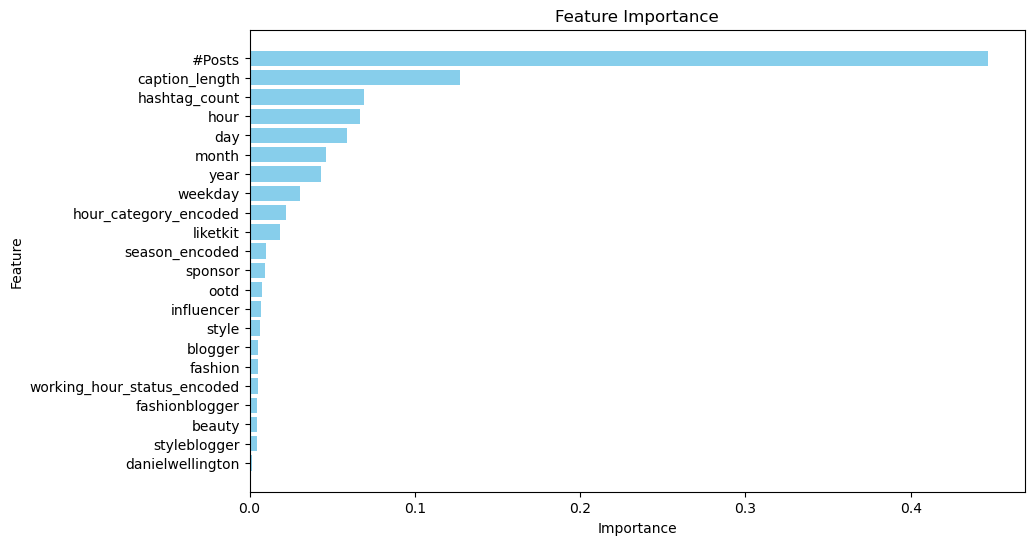

In [33]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.show()

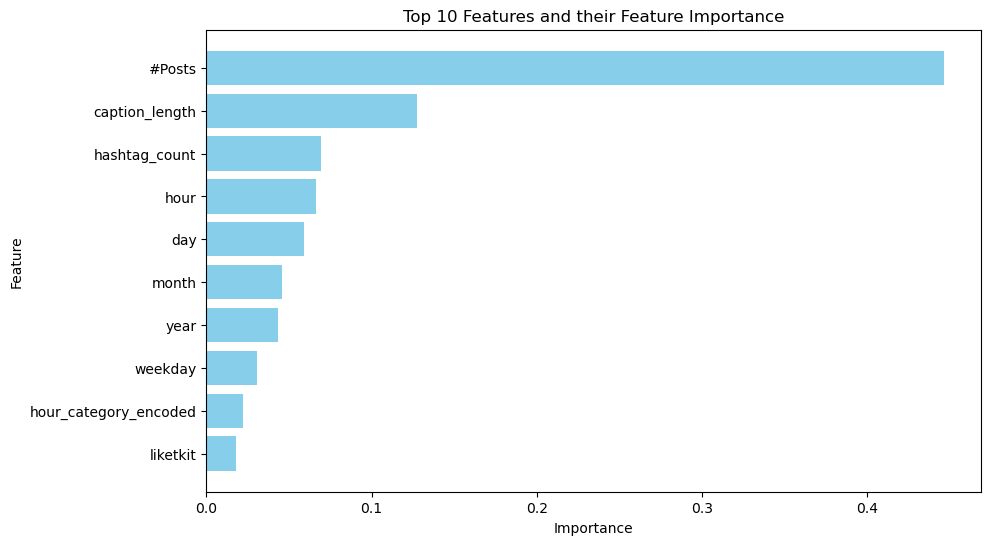

In [34]:
# Top 10 feature importance
feature_importance_df_10 = feature_importance_df[:10]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_10['Feature'], feature_importance_df_10['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features and their Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.show()

Visualize correlation of features with ER for comparison

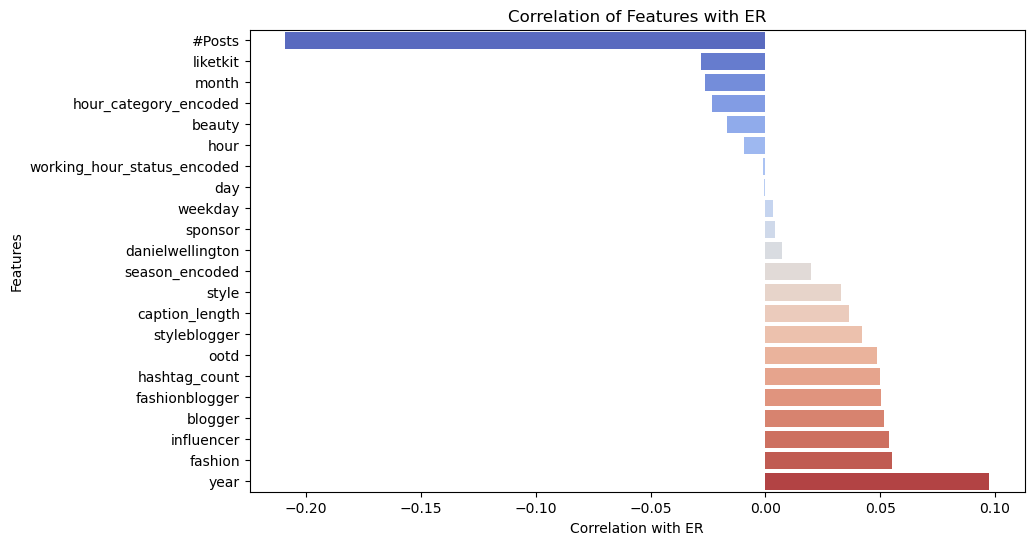

In [52]:
# Sort correlations by value
sorted_correlations = df_[['#Posts', 'sponsor', 'year', 'month', 'day', 'hour', 'weekday', 'season_encoded', 'hour_category_encoded', 'working_hour_status_encoded', 'hashtag_count', 'caption_length', 'liketkit', 'ootd', 'fashion', 'fashionblogger', 'danielwellington', 'blogger', 
            'style', 'styleblogger', 'beauty', 'influencer', 'ER']].corr()['ER'].drop('ER').sort_values()
er_correlation_df = sorted_correlations.to_frame().reset_index()

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ER', y='index', data=er_correlation_df, palette='coolwarm')
plt.xlabel('Correlation with ER')
plt.ylabel('Features')
plt.title('Correlation of Features with ER')
plt.show()


# Examine the significance of sponsorship to ER

### T test

In [79]:
df_.columns

Index(['post_timestamp', 'likes', 'comments', 'sponsor', 'ER', '#Followers',
       '#Posts', 'json', 'year', 'month', 'day', 'hour', 'weekday', 'season',
       'hour_category', 'working_hour_status', 'caption', 'hashtags',
       'hashtag_count', 'Username', 'caption_length', 'liketkit', 'ootd',
       'fashion', 'fashionblogger', 'danielwellington', 'blogger', 'style',
       'styleblogger', 'beauty', 'influencer', 'season_encoded',
       'hour_category_encoded', 'working_hour_status_encoded'],
      dtype='object')

In [78]:
# Separate sponsored and non-sponsored posts
sponsored_posts = df_[df_['sponsor'] == 1]
non_sponsored_posts = df_[df_['sponsor'] == 0]

# Step 2: Exploratory Data Analysis (EDA)
# Explore the distribution of engagement metrics for sponsored and non-sponsored posts
sponsored_likes_mean = sponsored_posts['likes'].mean()
non_sponsored_likes_mean = non_sponsored_posts['likes'].mean()

# Step 3: Statistical Analysis
# Perform statistical tests to compare engagement metrics between sponsored and non-sponsored posts
t_stat, p_value = stats.ttest_ind(sponsored_posts['likes'], non_sponsored_posts['likes'])

print('t value:', t_stat)
print('p value:', p_value)

t value: -1.9725794158170653
p value: 0.04854420236966636


Sponsor or not is not significant for the general range

### Chi-Sqaure

The effect of sponsorship on ER for each influencer

In [88]:
from scipy.stats import chi2_contingency

# Group data by 'Username' and 'Sponsor', and calculate the average ER for each group
grouped_data = instagram_data.groupby(['Username', 'sponsor'])['ER'].mean().unstack()

# Drop any rows with NaN values (if necessary)
grouped_data.dropna(inplace=True)

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(grouped_data)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 15.226742148881744
p-value: 1.0
Degrees of freedom: 5295
Expected frequencies table:
[[0.04649987 0.04454328]
 [0.1416156  0.13565681]
 [0.03572207 0.03421899]
 ...
 [0.03075414 0.02946009]
 [0.02170084 0.02078773]
 [0.02834312 0.02715052]]


The effect of sponsorship on ER for each month

In [114]:
grouped_data = instagram_data.groupby(['month', 'sponsor'])['ER'].mean().unstack()

# Drop any rows with NaN values (if necessary)
grouped_data.dropna(inplace=True)

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(grouped_data)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies table:
[[0.04328008 0.04491851]
 [0.05034004 0.05224573]]


The effect of sponsorship on ER for each weekday

In [114]:
grouped_data = instagram_data.groupby(['weekday', 'sponsor'])['ER'].mean().unstack()

# Drop any rows with NaN values (if necessary)
grouped_data.dropna(inplace=True)

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(grouped_data)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies table:
[[0.04328008 0.04491851]
 [0.05034004 0.05224573]]


The effect of sponsorship on ER for whether the hashgtag '#danielwellington' exists

In [98]:
grouped_data = instagram_data.groupby(['danielwellington', 'sponsor'])['ER'].mean().unstack()

# Drop any rows with NaN values (if necessary)
grouped_data.dropna(inplace=True)

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(grouped_data)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies table:
[[0.04443155 0.04712393]
 [0.04624041 0.04904241]]


In [93]:
grouped_data

sponsor,0,1
danielwellington,,
0,0.045165,0.045507
1,0.046391,0.049776


### Visualizations by difference of average ER of sponsored and non-sponsored posts

By user:estimate by difference between average ER of sponsored and not sponsored posts by each user

In [99]:
# Group data by account and sponsorship
grouped_data = df_.groupby(['Username', 'sponsor'])

# Calculate average ER for sponsored and non-sponsored posts for each account
avg_er_by_account = grouped_data['ER'].mean().unstack()

difference_er = avg_er_by_account[1] - avg_er_by_account[0]

What features about posts would affect the success of sponsored posts?

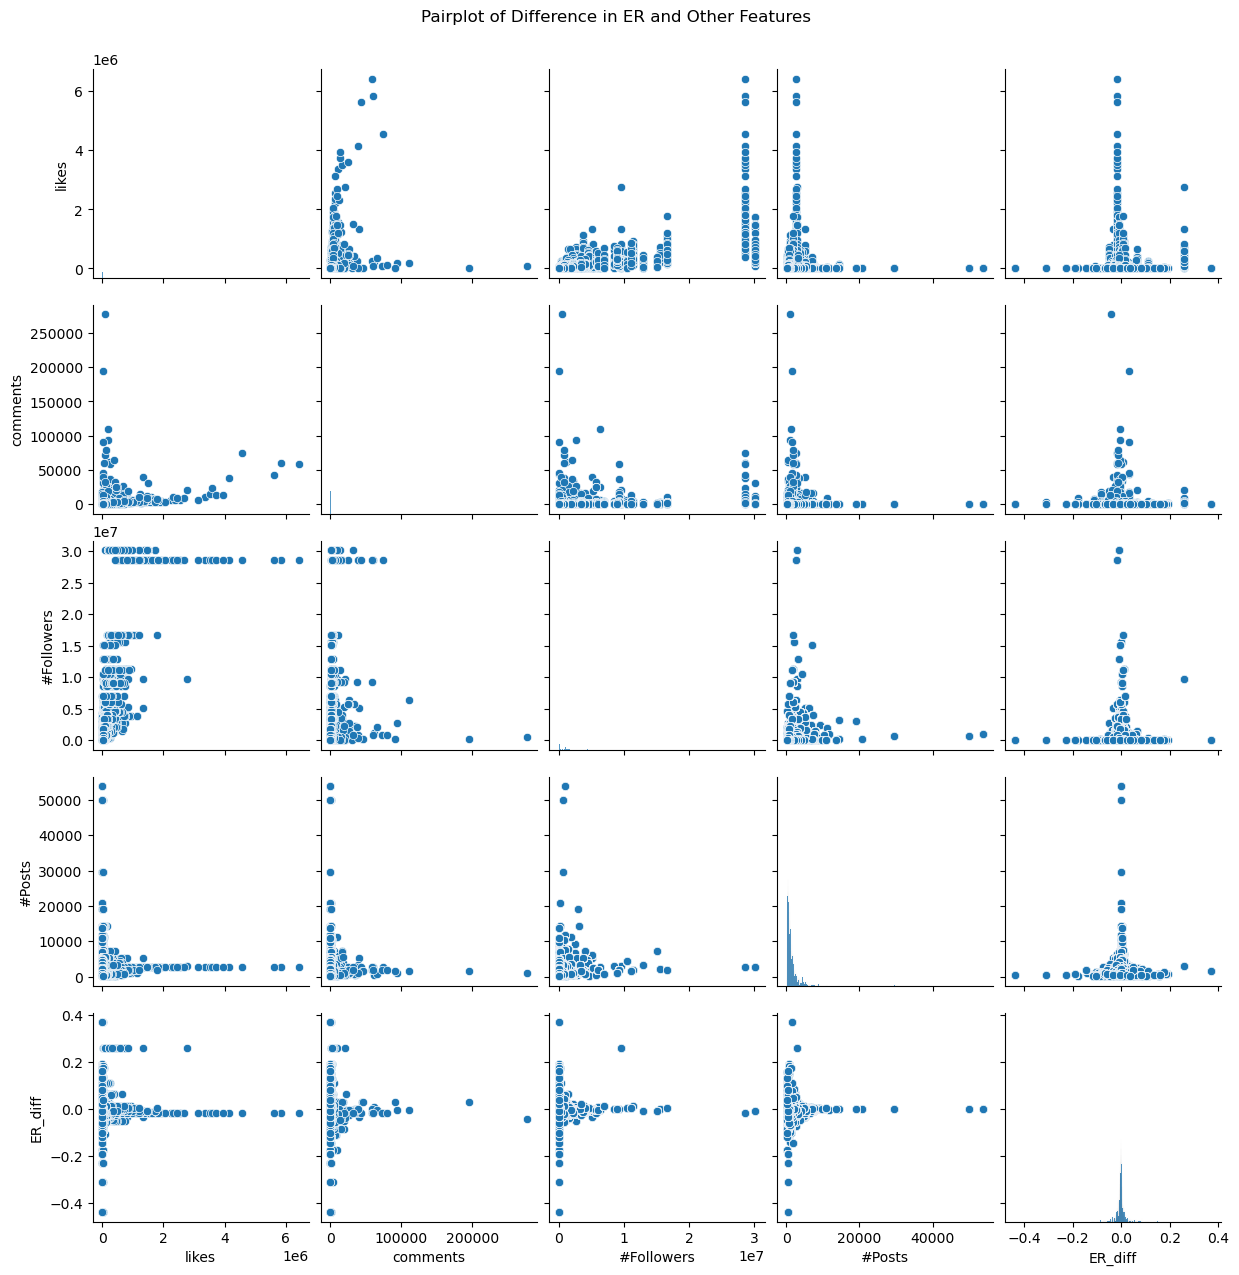

In [101]:
# Merge difference_er with the original dataset
difference_er.name = 'ER_diff'
instagram_data_merged = df_.merge(difference_er, left_on='Username', right_index=True, suffixes=('', '_diff'))

# Plotting
sns.pairplot(
    instagram_data_merged[['likes', 'comments', '#Followers', '#Posts', 'ER_diff']].dropna())
plt.suptitle('Pairplot of Difference in ER and Other Features', y=1.02)
plt.show()

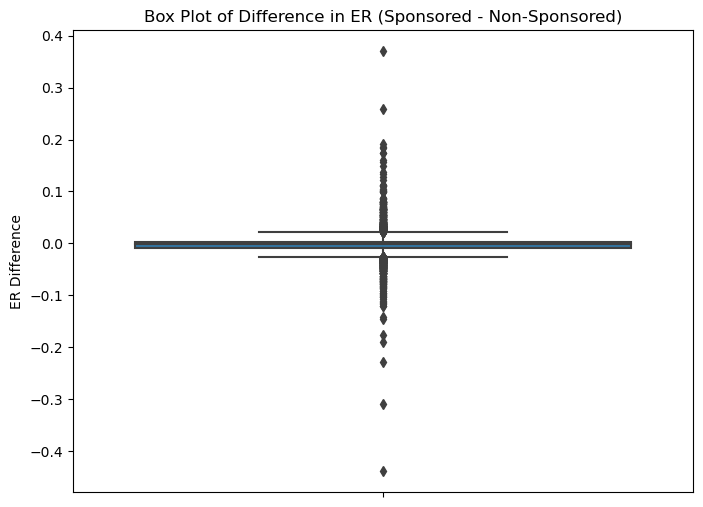

In [103]:
# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=difference_er)
plt.title('Box Plot of Difference in ER (Sponsored - Non-Sponsored)')
plt.ylabel('ER Difference')
plt.show()

ER Difference is highly concentrated to 0 in every visual, infering that sponsorship doesn't affect ER much for a specific influencer 

In [104]:
difference_er

Username
_____sarang      -0.043852
__lilybrown       0.011725
__marnifique__   -0.002615
__y___u_         -0.007462
_hermust_        -0.012033
                    ...   
zsanettkorosi    -0.000107
zsuzsubell        0.007097
zubiiansarii     -0.016135
zuzanastraska    -0.017665
zwithlove        -0.005126
Name: ER_diff, Length: 5332, dtype: float64

Check the influencers with the top 10 highest and lowest ER_diff

In [105]:
# Sort the Series by ER_diff
difference_er_sorted = difference_er.dropna().sort_values(ascending=False)

# Get the usernames with the 10 highest and lowest ER_diff
top_10_high_er_diff = difference_er_sorted.head(10)
bottom_10_low_er_diff = difference_er_sorted.tail(10)
top_10_usernames = top_10_high_er_diff.index.tolist()
bottom_10_usernames = bottom_10_low_er_diff.index.tolist()

# Filter the rows in instagram_data_merged by the top 10 and bottom 10 usernames
top_10_rows = instagram_data_merged[instagram_data_merged['Username'].isin(top_10_usernames)]
bottom_10_rows = instagram_data_merged[instagram_data_merged['Username'].isin(bottom_10_usernames)]
top_10_rows_unique = top_10_rows.groupby('Username').first().reset_index()
bottom_10_rows_unique = bottom_10_rows.groupby('Username').first().reset_index()

In [106]:
top_10_rows_unique[['Username', '#Followers', '#Posts', 'ER_diff']]

,Username,#Followers,#Posts,ER_diff
0,karolg,9648038.0,3007.0,0.258579
1,lexrucker,4153.0,784.0,0.149134
2,mowminessa,1194.0,558.0,0.160804
3,mykemetzger,22586.0,849.0,0.184899
4,phoebetorrance,33065.0,1538.0,0.370396
5,savageistheking,12613.0,1435.0,0.174403
6,sequoiashayvonne,2756.0,281.0,0.156861
7,taylorjeanineemory,1081.0,823.0,0.183374
8,tyyli_com,2566.0,655.0,0.191588
9,zanderhodgson,175493.0,1209.0,0.174573


In [107]:
bottom_10_rows_unique[['Username', '#Followers', '#Posts', 'ER_diff']]

,Username,#Followers,#Posts,ER_diff
0,jenn_scale,14374.0,486.0,-0.228106
1,juniemay_,1210.0,620.0,-0.190430
2,marielena.krewer,16138.0,358.0,-0.121128
3,marissamowry210,16616.0,435.0,-0.308678
4,mijatwins,2796.0,231.0,-0.117024
5,morgankayyy,2679.0,416.0,-0.120828
6,thestyleframe,2741.0,965.0,-0.141670
7,travelinghoppy,8914.0,496.0,-0.438976
8,vikihalmosii,23230.0,246.0,-0.176316
9,zozoewi,3260.0,1765.0,-0.146598
